# EDA and Pre-Processing:

Include a clear discussion that ensures all steps are clearly explained and addresses the following:
- How did you make sure that you are ready to apply machine learning models?
- What type of pre-processing is required on your data
- How can you define and refine various feature variables that you may potentially use for
the modeling?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Dataset Attributes

* Age: age of the patient [years]
* Sex: sex of the patient [M: Male, F: Female]
* ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
* RestingBP: resting blood pressure [mm Hg]
* Cholesterol: serum cholesterol [mm/dl]
* FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
* RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
* MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
* ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
* Oldpeak: oldpeak = ST [Numeric value measured in depression]
* ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
* HeartDisease: output class [1: heart disease, 0: Normal]


## Source
This dataset was created by combining different datasets already available independently but not combined before. In this dataset, 5 heart datasets are combined over 11 common features which makes it the largest heart disease dataset available so far for research purposes. The five datasets used for its curation are:

* Cleveland: 303 observations
* Hungarian: 294 observations
* Switzerland: 123 observations
* Long Beach VA: 200 observations
* Stalog (Heart) Data Set: 270 observations
* Total: 1190 observations

Duplicated: 272 observations

# Load the data

In [2]:
df = pd.read_csv("/home/argha/Dropbox/00_cpt/03_Third_sem/anly_530/project/heart.csv")

In [3]:
df.sample(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
227,38,M,ASY,92,117,0,Normal,134,Y,2.5,Flat,1
17,43,F,ATA,120,201,0,Normal,165,N,0.0,Up,0
331,56,M,ASY,115,0,1,ST,82,N,-1.0,Up,1
30,53,M,NAP,145,518,0,Normal,130,N,0.0,Flat,1
695,58,M,ASY,146,218,0,Normal,105,N,2.0,Flat,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
df.shape

(918, 12)

# Summary of the Data:

This dataset contains information related to cardiovascular disease. The dataset has 918 rows. It includes 6 numerical features, and 5 categorical features that are relevant in predicting heart disease. The target variable `HeartDisease` indicates the presence (1) or absence (0) of heart disease.

# Summary Statistics:

- Age: The mean age of the patients in the dataset is 53.5 years, with a standard deviation of 9.4 years. The age ranges from 28 to 77 years, with 25% of patients below 47 years, 50% between 47 and 54 years (median), and 75% below 60 years.

- Resting Blood Pressure (RestingBP): The mean resting blood pressure is 132.4 mm Hg, with a standard deviation of 18.5 mm Hg. The resting blood pressure ranges from 0 to 200 mm Hg, with 25% of patients having a blood pressure below 120 mm Hg, 50% between 120 and 130 mm Hg (median), and 75% below 140 mm Hg.

- Cholesterol: The mean serum cholesterol level is 198.8 mm/dl, with a standard deviation of 109.4 mm/dl. Cholesterol levels range from 0 to 603 mm/dl. Of all data points, 25% of patients have cholesterol levels below 173.3 mm/dl. 50% population sample have between 173.3 and 223 mm/dl (median), and 75% below 267 mm/dl.

- Fasting Blood Sugar (FastingBS): 76.7% have fasting blood sugar less than or equal to 120 mg/dl (coded as 0) and 23.3% of patients have fasting blood sugar greater than 120 mg/dl (coded as 1).

- Maximum Heart Rate Achieved (MaxHR): The mean maximum heart rate achieved is 136.8 bpm, with a standard deviation of 25.5 bpm. The maximum heart rate ranges from 60 to 202 bpm, with 25% of patients have max heart rate below 120 bpm, 50% between 120 and 138 bpm, and 75% below 156 bpm.

- Oldpeak: The mean value of ST depression is 0.89, with a standard deviation of 1.07. The ST depression values range from -2.6 to 6.2.

- Heart Disease (Dependent Variable): The dataset has 55.3% of patients diagnosed with heart disease (coded as 1) and 44.7% without heart disease (coded as 0). Based on the proportions the data does not have label imbalance.



In [6]:
# Summary Statistics
summary_stats = df.describe().T
print("Summary Statistics:")
print(summary_stats)

Summary Statistics:
              count        mean         std   min     25%    50%    75%    max
Age           918.0   53.510893    9.432617  28.0   47.00   54.0   60.0   77.0
RestingBP     918.0  132.396514   18.514154   0.0  120.00  130.0  140.0  200.0
Cholesterol   918.0  198.799564  109.384145   0.0  173.25  223.0  267.0  603.0
FastingBS     918.0    0.233115    0.423046   0.0    0.00    0.0    0.0    1.0
MaxHR         918.0  136.809368   25.460334  60.0  120.00  138.0  156.0  202.0
Oldpeak       918.0    0.887364    1.066570  -2.6    0.00    0.6    1.5    6.2
HeartDisease  918.0    0.553377    0.497414   0.0    0.00    1.0    1.0    1.0


# Data visualization for numerical features

- Age: This plot shows the distribution of the number of people by age. The majority of people are between the ages of 45 and 60, with a smaller number of people in the younger and older age groups.

- RestingBP: This plot shows the distribution of the resting blood pressure (BP) of the people in the data. The majority of people have a resting BP of between 120 and 140 mmHg.

- Cholesterol: This plot shows the distribution of the cholesterol levels of the people in the data. The majority of people have a cholesterol level of between 170 and 270 mg/dL.

- FastingBS: This plot shows the distribution of the fasting glucose levels of the people in the data. The majority of people have a fasting glucose level of below 120 mg/dL, with a smaller number of people having a higher or lower fasting glucose level.

- MaxHR: This plot shows the distribution of the maximum heart rate (HR) of the people in the data. The majority of people have a maximum HR of between 120 and 180 bpm, with a smaller number of people having a higher or lower maximum HR.

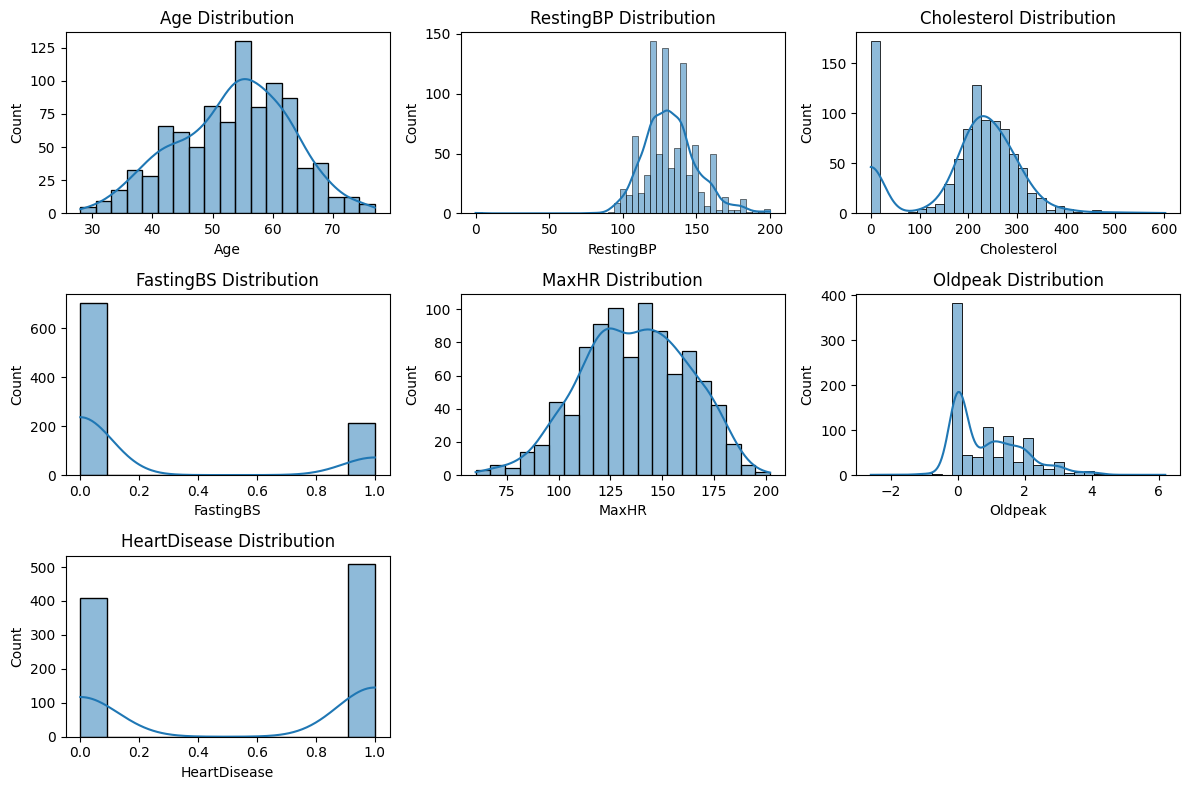

In [36]:
# Data Visualization
num_feats = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
for i, feature in enumerate(num_feats.columns):
    plt.subplot(3, 3, i+1)
    sns.histplot(data=num_feats, x=feature, kde=True)
    plt.title(f"{feature} Distribution")
plt.tight_layout()
plt.show()


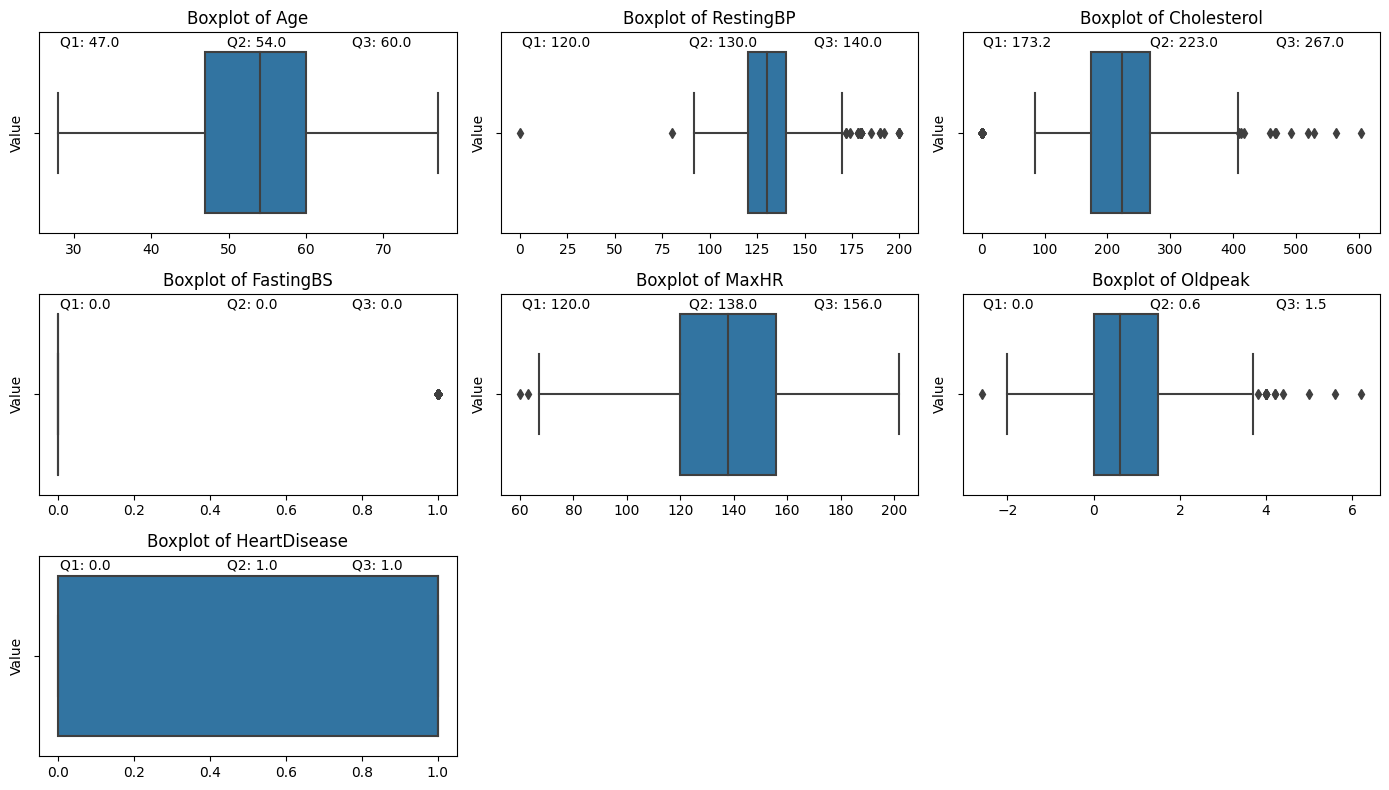

In [26]:
# Box plot with quantile values for numerical features
numerical_features = df.select_dtypes(include=[np.number])

# Number of rows and columns for the subplots
num_rows, num_cols = numerical_features.shape
num_plots = num_cols

plt.figure(figsize=(14, 8))

# Loop through each numerical feature and create individual subplots for boxplots
for i, feature in enumerate(numerical_features.columns):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(data=df, x=feature)
    plt.title(f"Boxplot of {feature}")
    plt.xlabel("")
    plt.ylabel("Value")

    # Calculate quantile values for the current numerical feature
    quantile_values = numerical_features[feature].quantile([0.25, 0.5, 0.75])
    median = quantile_values.loc[0.5]
    q1 = quantile_values.loc[0.25]
    q3 = quantile_values.loc[0.75]

    # Annotate quantile values below the boxplot
    plt.text(0.05, 0.95, f'Q1: {q1:.1f}', ha='left', va='center', transform=plt.gca().transAxes)
    plt.text(0.45, 0.95, f'Q2: {median:.1f}', ha='left', va='center', transform=plt.gca().transAxes)
    plt.text(0.75, 0.95, f'Q3: {q3:.1f}', ha='left', va='center', transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()

# Data visualization for categorical features

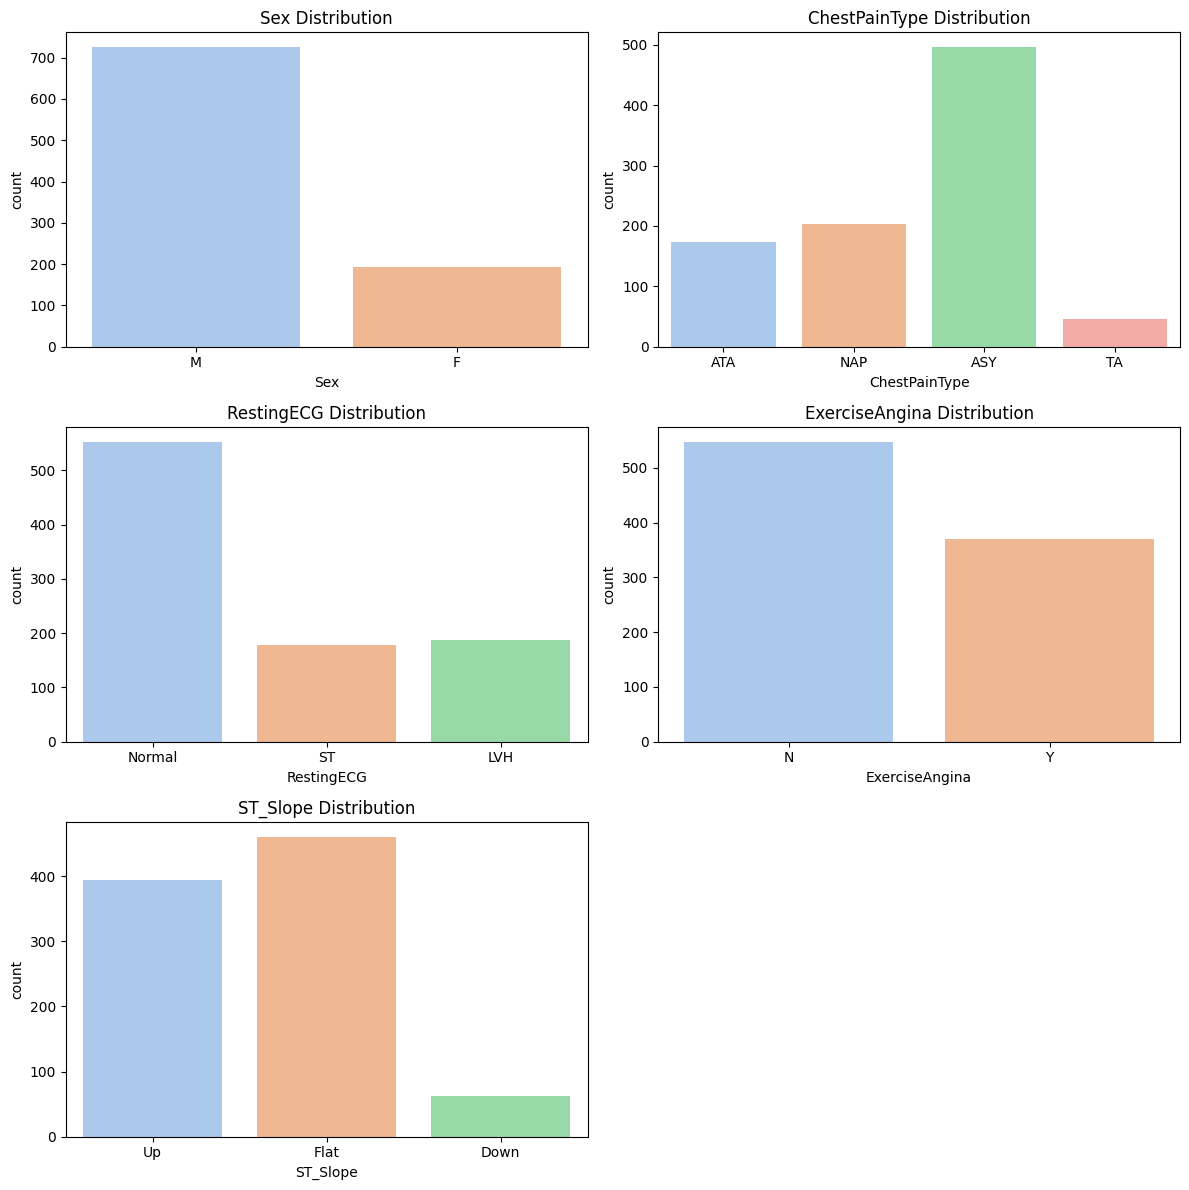

In [23]:
# Data Visualization - Categorical Features (Bar Plots)
cat_feats = df.select_dtypes(include=['object'])
plt.figure(figsize=(12, 12))
for i, feature in enumerate(cat_feats.columns):
    plt.subplot(3, 2, i+1)
    sns.countplot(data=df, x=feature, palette='pastel')
    plt.title(f"{feature} Distribution")
plt.tight_layout()
plt.show()

# Distribution of dependent/output variable


Class Distribution:
1    508
0    410
Name: HeartDisease, dtype: int64


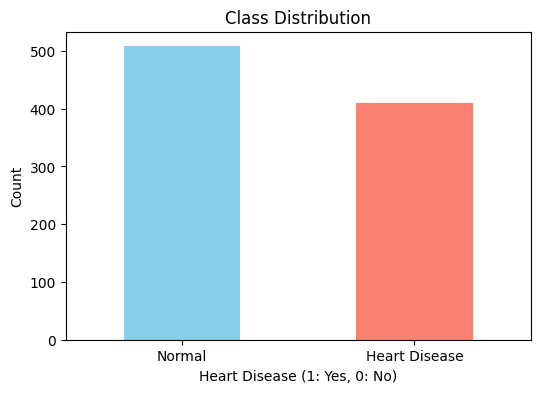

In [20]:
# Class Distribution
class_distribution = df['HeartDisease'].value_counts()
print("\nClass Distribution:")
print(class_distribution)



plt.figure(figsize=(6, 4))
class_distribution.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Class Distribution")
plt.xlabel("Heart Disease (1: Yes, 0: No)")
plt.ylabel("Count")
plt.xticks([0, 1], ['Normal', 'Heart Disease'], rotation=0)
plt.show()

# Correlation Analysis

The correlation plot shows the relationship between the 7 numerical variables in the study: age, resting blood pressure (BP), cholesterol, fasting BS, maximum heart rate (HR), Oldpeak, and output variable heart disease. 

A positive correlation coefficient indicates that the two variables are related in a positive way, meaning that as one variable increases, the other variable also increases. A negative correlation coefficient indicates that the two variables are related in a negative way, meaning that as one variable increases, the other variable decreases.

The correlation plot shows that there are a number of positive correlations between the variables in the study. For example, there is a positive correlation between age and fasting BS (0.20), meaning that as people get older, their fasting BS levels tend to increase. There is also a positive correlation between maximum heart rate and cholesterol (0.24), meaning that people with higher cholesterol levels are more likely to have higher max heart rate.

There are also a number of negative correlations between the variables in the data. For example, there is a negative correlation between maximum heart rate and age (-0.38), meaning as people older their maximum heart rate decreases. There is also a negative correlation between maximum heart rate and heart disease (-0.40), meaning that people with lower maximum heart rate are more likely to have heart disease.

The correlation plot can be used to identify which variables are most strongly related to heart disease. The variables with the strongest correlations with heart disease are Oldpeak (0.40) and maximum heart rate (-0.40). This suggests that these two variables may be important risk factors for heart disease.


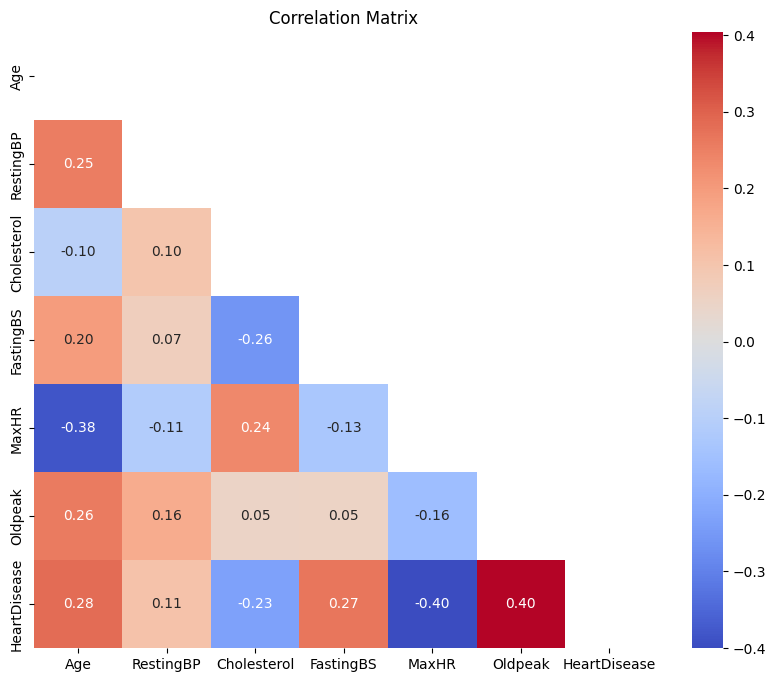

In [27]:

# Correlation Analysis
correlation_matrix = df.corr(numeric_only=True)

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", mask=mask)
plt.title("Correlation Matrix")
plt.show()


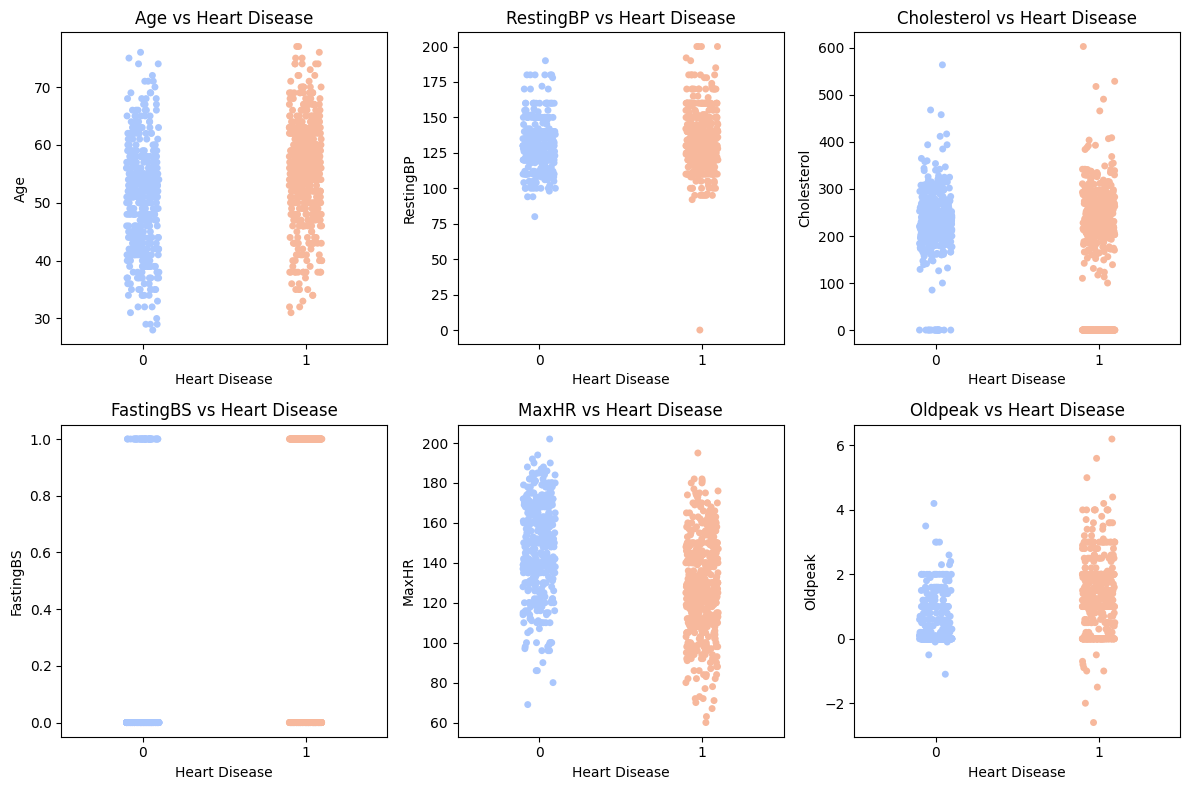

In [40]:
# Scatter plots with numerical independent variables against the dependent variable 'HeartDisease'
numerical_features = df.select_dtypes(include=[np.number])

# Number of rows and columns in the numerical features DataFrame
num_rows, num_cols = numerical_features.shape

# Number of subplots required (excluding the dependent variable 'HeartDisease')
num_plots = num_cols - 1

# Setting the size of the scatter plot grid
plt.figure(figsize=(12, 8))

# Loop through each numerical independent variable and create the scatter plot
for i, feature in enumerate(numerical_features.columns[:-1]):
    plt.subplot(2, 3, i + 1)
    sns.stripplot(data=df, x='HeartDisease', y=feature, jitter=True, palette='coolwarm', hue='HeartDisease')
    plt.title(f"{feature} vs Heart Disease")
    plt.xlabel('Heart Disease')
    plt.ylabel(feature)
    plt.legend().set_visible(False)

plt.tight_layout()
plt.show()

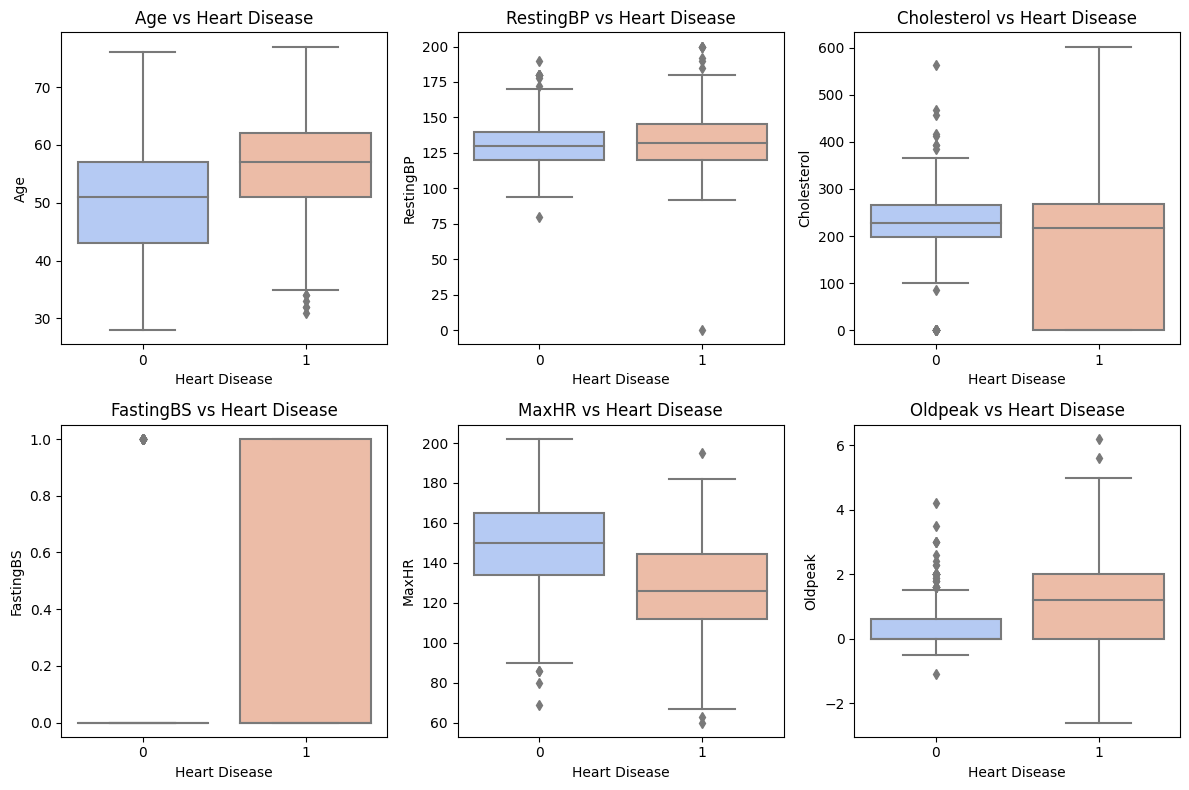

In [41]:
# Box plots with numerical independent variables against the dependent variable 'HeartDisease'
numerical_features = df.select_dtypes(include=[np.number])

# Number of rows and columns in the numerical features DataFrame
num_rows, num_cols = numerical_features.shape

# Number of subplots required (excluding the dependent variable 'HeartDisease')
num_plots = num_cols - 1

# Setting the size of the box plot grid
plt.figure(figsize=(12, 8))

# Loop through each numerical independent variable and create the box plot with hue as 'HeartDisease'
for i, feature in enumerate(numerical_features.columns[:-1]):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(data=df, x='HeartDisease', y=feature, palette='coolwarm')
    plt.title(f"{feature} vs Heart Disease")
    plt.xlabel('Heart Disease')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

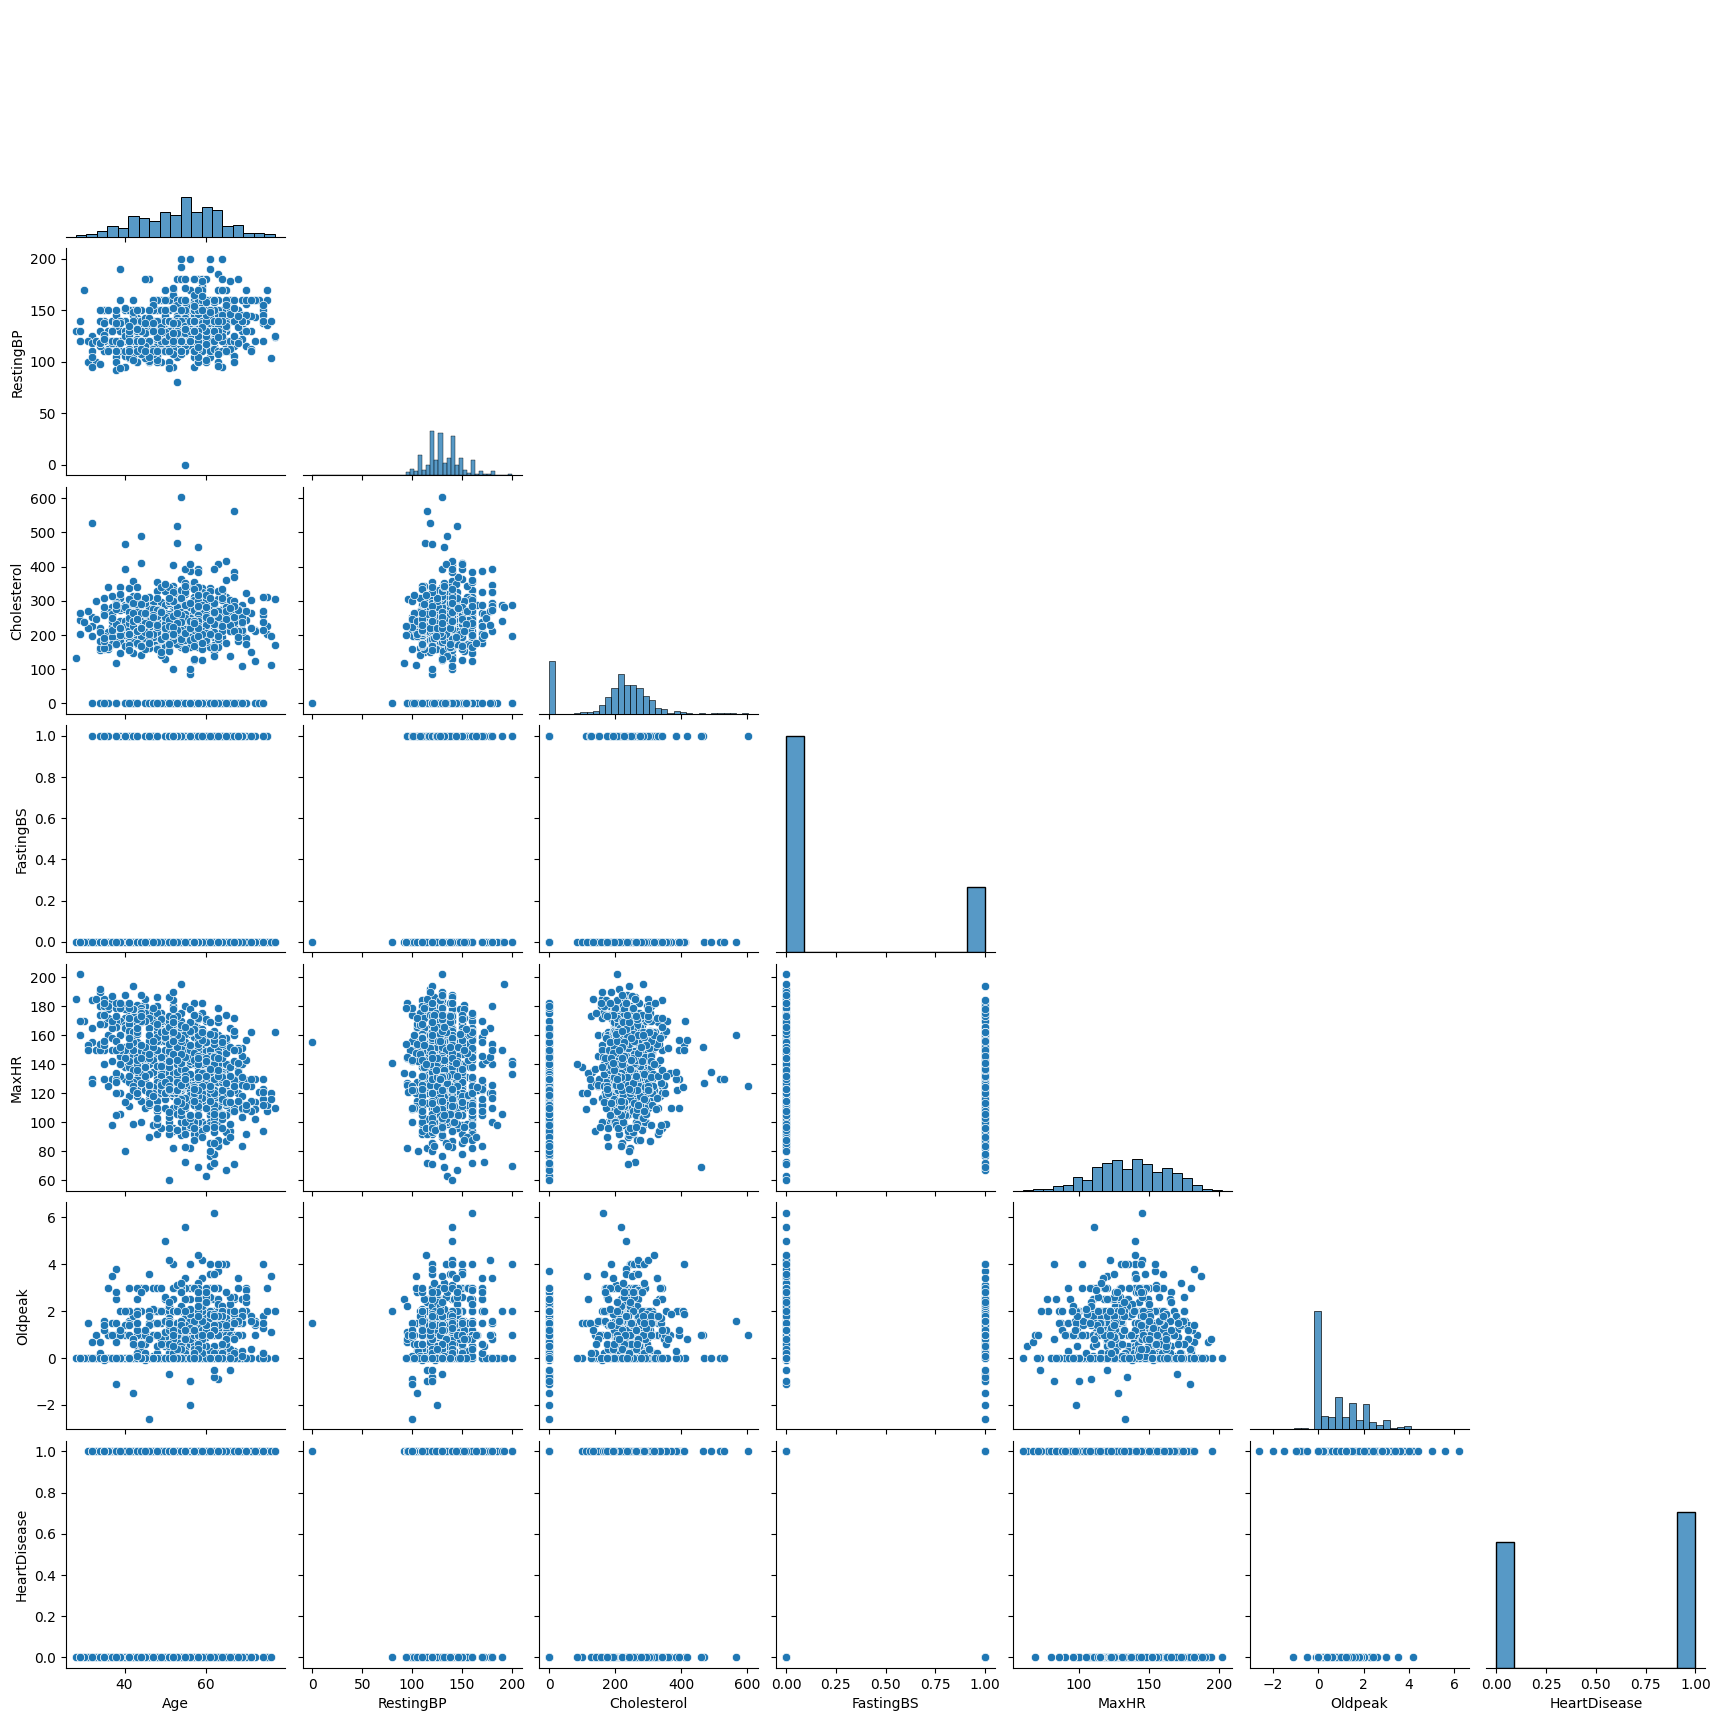

In [38]:
# Data Visualization - Pairplot for Numerical Features
num_feats = df.select_dtypes(include=[np.number])

sns.pairplot(num_feats, corner=True)
plt.show()

# Check for missing values

There are no missing values in the data

In [43]:

# Handling Missing Values
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values)



Missing Values:
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64
